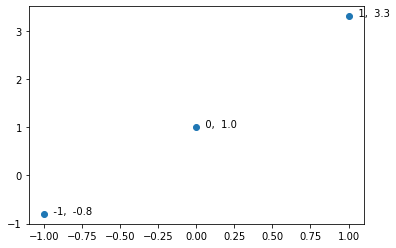

In [262]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, Image
import numpy as np
from mpl_toolkits import mplot3d

x = np.array([-1,0,1])
y = np.array([-0.8,1,3.3])

def plot_original_points():
    plt.scatter(x,y)
    for i in range(3):
        plt.annotate(xy=(x[i], y[i]), text=f"   {x[i]},  {y[i]}")

plot_original_points()

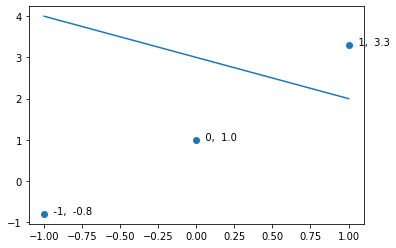

In [263]:
m = -1
c = 3
y_pred = m * x + c
plt.plot(x, y_pred)
plot_original_points()

In [264]:
print("Objective: Minimize following loss")
display(Math(r'Loss = \sum_{i=1}^{N}(x_i-y_i)^2'))
print("Reason for square: To obtain a possible loss whenever there is a difference regardless of order")

Objective: Minimize following loss


<IPython.core.display.Math object>

Reason for square: To obtain a possible loss whenever there is a difference regardless of order


In [265]:
display(Math(r'Loss = (x_1-y_1)^2 +(x_2-y_2)^2 +(x_3-y_3)^2'))

<IPython.core.display.Math object>

In [266]:
def get_loss(y, y_pred):
    return np.square(y_pred - y).sum()

def get_y_pred(m,c):
    y_preds = np.zeros((len(m), len(x)))
    for i in range(len(m)):
        y_preds[i] = m[i] * x + c[i]
    return y_preds

<Axes3DSubplot:xlabel='m', ylabel='c'>

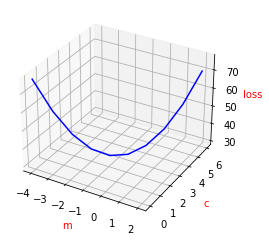

In [267]:
def plot_loss():
    m_values = np.linspace(m-3,m+3, 10)
    c_values = np.linspace(c-3,c+3, 10)

    y_preds = get_y_pred(m_values, c_values)
    losses = np.zeros_like(m_values)
    for i in range(len(m_values)):
        losses[i] = get_loss(y, y_preds[i])

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(m_values, c_values, losses, 'blue')
    ax.set_xlabel("m")
    ax.set_ylabel("c")
    ax.set_zlabel("loss")
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('red')
    ax.zaxis.label.set_color('red')
    return ax

plot_loss()

Plot current m,c,loss
0.13


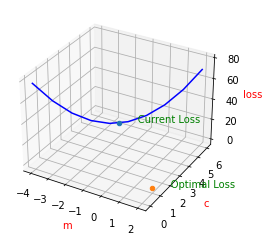

In [268]:
print("Plot current m,c,loss")
loss = get_loss(y, y_pred)
ax = plot_loss()
ax.scatter3D(m,c,loss,"green")
ax.text(m, c, loss, f"      Current Loss", color='green')

m = 2
c = 1
y_pred = m * x + c
loss = get_loss(y, y_pred)
ax.scatter3D(m,c,loss,"green")
ax.text(m, c, loss, f"      Optimal Loss", color='green')

print(f"{loss:.2f}")
